In [3]:
""" same, but handpicked, so comparing specific tasks for figures, across training epoch.
Also code developing, for null model in model-based scoring
"""


' same, but handpicked, so comparing specific tasks for figures, across training epoch.\nAlso code developing, for null model in model-based scoring\n'

In [4]:
%load_ext autoreload
%autoreload 2

%cd ..
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *
from analysis.line2 import *
from analysis.modelexpt import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

/data1/code/python/drawmonkey
NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


## NULL MODEL

In [ ]:
PD = ProbedatTaskmodel(PROBEDATextract)

# 3) Buidl model

# strokes = getTrialsStrokesByPeanuts(PROBEDATextract[0]["filedata"], PROBEDATextract[0]["trial"])
# chunkmodel(strokes)
                                    
chunkmodel = PD.makeParseFunction("linePlusL")
priorver = "uniform"
parse_ver = "chunks"
posterior_ver = "maxlikeli"
name = "test"
PARAMS, PARAMS_MODEL = PD.getParams(priorver=priorver, parse_ver=parse_ver, 
                                    chunkmodel=chunkmodel, name=name,
                                    posterior_ver=posterior_ver)
PD.applyModel(PARAMS, PARAMS_MODEL)

PD.Datamodel.plotExampleTrial(1)



## HAND-PICKED EXAMPLES 

In [18]:
animal = "Red"
expt = "lines5"

tasklist_generic = [
    "linePlusLv2_178",
    "linePlusLv2_22",
    "linePlusLv2_28",
    "linePlusLv2_4",
    "linePlusLv2_5",
    "linePlusLv2_6",
    "linePlusLv2_9",
    "linePlusLv2_98",
    "3linePlusL_147",
    "3linePlusL_159",
    "3linePlusL_34",
    "3linePlusL_51",
    "3linePlusL_6",
    "3linePlusL_9",
    "LplusL_6",
    "LplusL_92"]

# saving dir
SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_modelexpt_multsession_handpicked/{expt}/multday_{animal}"
import os
os.makedirs(SAVEDIR, exist_ok=True)
print(f"saving at {SAVEDIR}")



saving at /data2/analyses/notebook/analysis_modelexpt_multsession_handpicked/lines5/multday_Red


In [8]:
FD, MD = loadMultDataForExpt(expt, animal, whichdates="all", metadatonly=False)
PROBEDAT = loadProbeDatWrapper(FD, MD, getnumstrokes=True)

# saving dir

# get all fixed tasks of a particular kind
kindlist = set([P["kind"] for P in PROBEDAT if P["random_task"]==False])
task_per_kind = {}
for kind in kindlist:
    tasklist = set([P["unique_task_name"] for P in PROBEDAT if P["kind"]==kind])
    task_per_kind[kind]=sorted(tasklist)

print("tasks per kind found")
for k, v in task_per_kind.items():
    print("----")
    print(f"=={k}")
    [print(vv) for vv in v]


## PLOT - all trials, 2d grid sorted by date and task category
# only keep data for fixed tasks.
PROBEDATthis = [P for P in PROBEDAT if P["random_task"]==False]
datelist = sorted(set([P["date"] for P in PROBEDATthis]))
fdlist = None



This is metadat:
{'sdate': 200921, 'edate': 201001, 'strokmodel_kind': 'spatial', 'strokmodel_tstamp': '201006_032853_lines5', 'datecategories': {'200921': 1, '200922': 1, '200923': 1, '200924': 1, '200925': 2, '200926': 2, '200927': 2, '200928': 2, '200929': 2, '200930': 2, '201001': 2}, 'dates_for_summary': ['200923', '200924', '200929', '200930', '201001'], 'matchedstrokes': None, 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}, 'expt': 'lines5'}

Getting these dates:
['200921', '200922', '200923', '200924', '200925', '200926', '200927', '200928', '200929', '200930', '201001']
- No h5 file for Red, 200921, lines5, 0 - returning None!
-- loaded presaved data: /data2/animals/Red/200921/200921_135553_lines5_Red_1.pkl
got 986 total trials
appending fd for sess 1
- No h

got 984 total trials
got 878 total trials
got 545 total trials
got 504 total trials
got 77 total trials
got 759 total trials
got 1134 total trials
got 1258 total trials
got 1055 total trials
got 1007 total trials
got 876 total trials
got 811 total trials
saving at /data2/analyses/notebook/analysis_modelexpt_multsession/lines5/multday_Red_200921_to_201001/handpicked
tasks per kind found
----
==probe3_hdpos
C_1-protype
C_2-protype
F_1-protype
F_2-protype
S_1-protype
S_2-protype
h_1-protype
h_2-protype
linePlusLv2_11-savedset-1
linePlusLv2_119-savedset-1
linePlusLv2_13-savedset-1
linePlusLv2_155-savedset-1
linePlusLv2_16-savedset-1
linePlusLv2_18-savedset-1
linePlusLv2_22-savedset-1
linePlusLv2_46-savedset-1
linePlusLv2_51-savedset-1
linePlusLv2_59-savedset-1
linePlusLv2_61-savedset-1
linePlusLv2_69-savedset-1
linePlusLv2_7-savedset-1
linePlusLv2_76-savedset-1
linePlusLv2_79-savedset-1
linePlusLv2_80-savedset-1
linePlusLv2_97-savedset-1
triangle_1-protype
tristar_1-protype
----
==probe1_n

In [9]:
# --- get unique task names
tasklist = []
for P in PROBEDATthis:
    if P["random_task"]==False:
        for t in tasklist_generic:
            if f"{t}-" in P["unique_task_name"]:
                tasklist.append(P["unique_task_name"])
                break
tasklist = list(set(tasklist))
print(len(tasklist))



18


In [11]:
# == for each task, extract the N single trials, using tval
N = 1
extractthis = [(1, N, "end"), (2, N, "start")] # (epoch, num, what period)

PROBEDATextract = []
for e in extractthis:
    epoch = e[0]
    n = e[1]
    window = e[2]
    
    for task in tasklist:
        Pcandidates = [P for P in PROBEDATthis if 
         P["unique_task_name"]==task and
         P["epoch"] == epoch]
        
        # - sort by actual time
        Pcandidates = sorted(Pcandidates, key=lambda x:x["tval"])

        if len(Pcandidates)<N:
            Pout = Pcandidates
        if window=="end":
            Pout = Pcandidates[-N:]
        elif window=="start":
            Pout = Pcandidates[:N]
        else:
            assert False, "not coded"
        PROBEDATextract.extend(Pout)
        
print(len(PROBEDATextract))
            
            
 

36


starting len ofprobedat: 36
after filtering: 36
[parsing]
built and applied model (but did not optimize params)
[parsing]
built and applied model (but did not optimize params)
[parsing]
built and applied model (but did not optimize params)
[parsing]
built and applied model (but did not optimize params)
[parsing]
built and applied model (but did not optimize params)
good, len of dataset and probedat match
added sumary score called modelcomp_offline
good, len of dataset and probedat match
added sumary score called 3line
good, len of dataset and probedat match
added sumary score called onechunk
good, len of dataset and probedat match
added sumary score called linePlusL
good, len of dataset and probedat match
added sumary score called 3line_combine
good, len of dataset and probedat match
added sumary score called linePlusL_combine


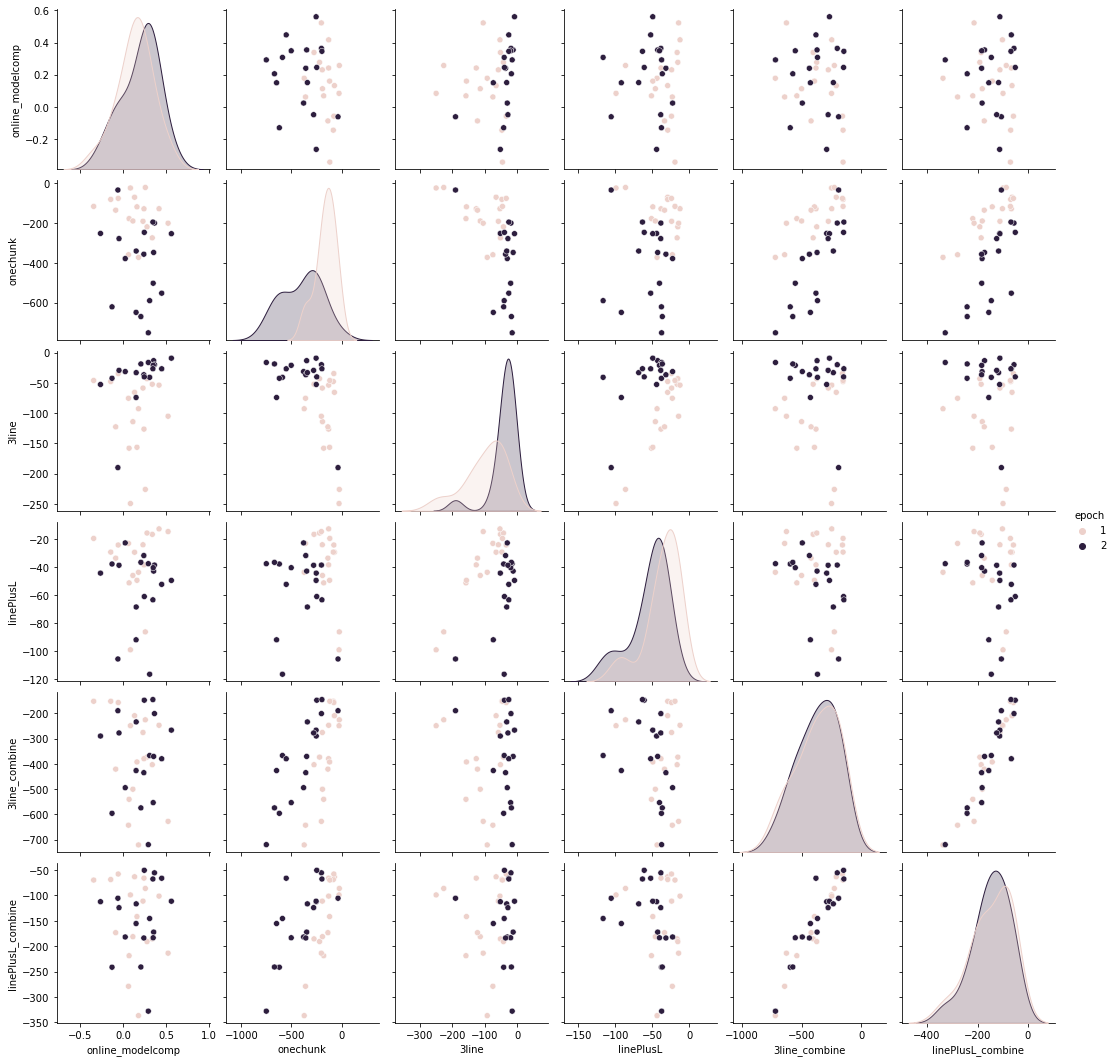

In [35]:
# ***************************************** COMPUTE MODEL SCORE OFFLIEN
from analysis.probedatTaskmodel import *
PROBEDATextract, fig = probedatOfflineScore(PROBEDATextract, filtdict={"random_task":[False]}, 
                               ploton=True)


In [38]:
fig.savefig(f"{SAVEDIR}/pairplot_modelscores.pdf")

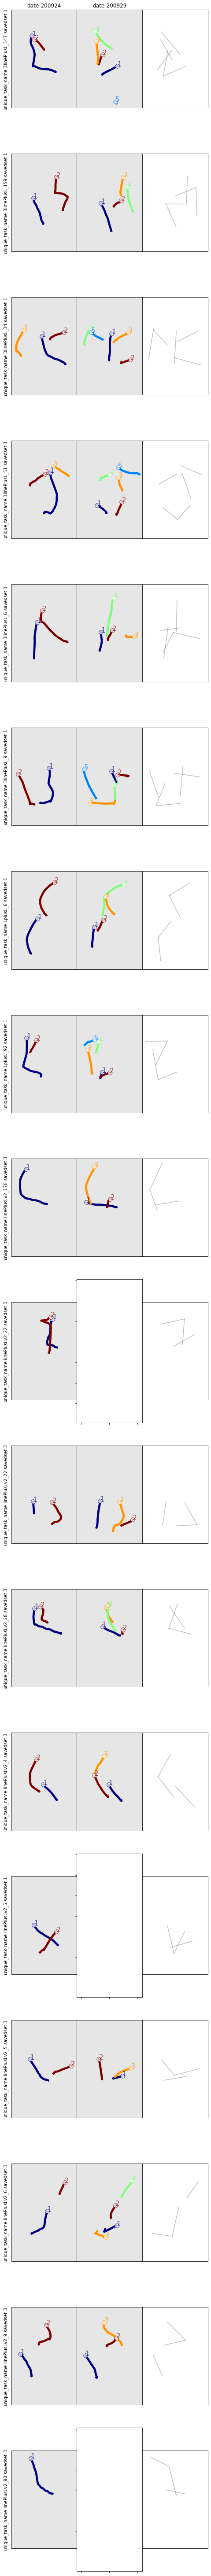

In [22]:
# -- Plot 2d grid, separated by days
CAT2 = ["date", ["200924", "200929"]]
CAT1 = ["unique_task_name", []]
fdlist = None

# == 1) All behavior trials, all strokes overlaid
plotargs = {"zoom":True, "plotver":"order", "markersize":8, "alpha":0.7}
plot_task_last_col = True
ver = "beh"
clean=True

fig, placed = plotTrial2dGrid(PROBEDATextract, fdlist = fdlist, cat1 = CAT1, cat2 = CAT2, ver=ver, 
                      plotargs=plotargs, plot_task_last_col=plot_task_last_col, clean=clean, return_placed=True);
plt.subplots_adjust(wspace=0, hspace=0)



In [23]:
fig.savefig(f"{SAVEDIR}/example_trials.pdf")

In [28]:
PROBEDATextract[0].keys()

dict_keys(['filedata', 'animal', 'expt', 'date', 'session', 'trial', 'trial_day', 'kind', 'unique_task_name', 'task_stagecategory', 'block', 'random_task', 'probe', 'feedback_ver', 'feedback_ver_prms', 'constraints_to_skip', 'prototype', 'saved_setnum', 'tasknum', 'resynthesized', 'resynthesized_path', 'resynthesized_trial', 'resynthesized_setnum', 'resynthesized_setname', 'dist_total', 'hausdorff', 'modelscore', 'modelcomp', 'numstrokes', 'tval', 'epoch', 'taskgroup', 'insummarydates', 'nstrokesactual', 'trialcode', 'modelcomp_offline', '3line', 'onechunk', 'linePlusL'])

In [36]:
# ==== PLOT SCORES TO GO ALONG WITH DRAWINGS
collist = [0, 1]
rowlist = range(max([k[0] for k in placed.keys()]))

out = []
# -- collect all scores
for col in collist:
    for row in rowlist:
        if placed[(row, col)] is not None:
            task = placed[(row, col)][0]
            date = placed[(row, col)][1]

            # - get score for this task and date
            Pthis = [P for P in PROBEDATextract if P[CAT1[0]]==placed[(row, col)][0]
             and P[CAT2[0]]==placed[(row, col)][1]]
            
            for mod in ["3line", "linePlusL", "onechunk", "modelcomp_offline", "3line_combine", "linePlusL_combine"]:
                out.append({
                    "rownum":row,
                    "colnum":col,
                    "row":placed[(row, col)][0],
                    "col":placed[(row, col)][1],
                    "model":mod,
                    "score":Pthis[0][mod]
                })
#             out.append({
#                 "rownum":row,
#                 "colnum":col,
#                 "row":placed[(row, col)][0],
#                 "col":placed[(row, col)][1],
#                 "3line":Pthis[0]["3line"],
#                 "linePlusL":Pthis[0]["linePlusL"]
#             })
            
df = pd.DataFrame(out)
df

,rownum,colnum,row,col,model,score
0,0,0,3linePlusL_147-savedset-1,200924,3line,-156.443406
1,0,0,3linePlusL_147-savedset-1,200924,linePlusL,-49.411176
2,0,0,3linePlusL_147-savedset-1,200924,onechunk,-119.719162
3,0,0,3linePlusL_147-savedset-1,200924,modelcomp_offline,0.519941
4,0,0,3linePlusL_147-savedset-1,200924,3line_combine,-392.783013
...,...,...,...,...,...,...
187,16,1,linePlusLv2_9-savedset-3,200929,linePlusL,-42.858604
188,16,1,linePlusLv2_9-savedset-3,200929,onechunk,-348.567407
189,16,1,linePlusLv2_9-savedset-3,200929,modelcomp_offline,-0.526122
190,16,1,linePlusLv2_9-savedset-3,200929,3line_combine,-370.882378


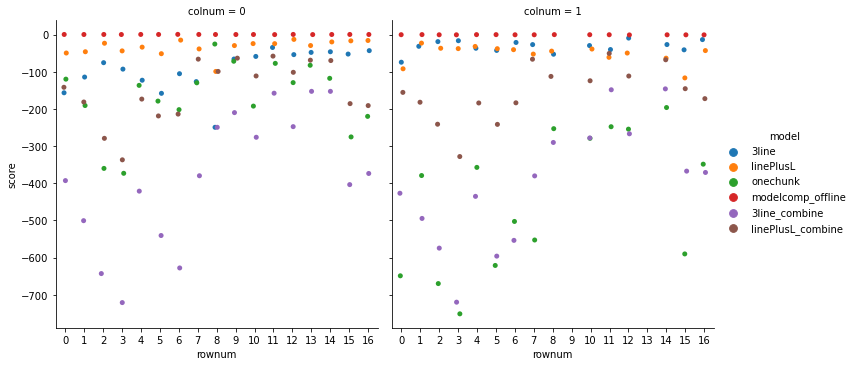

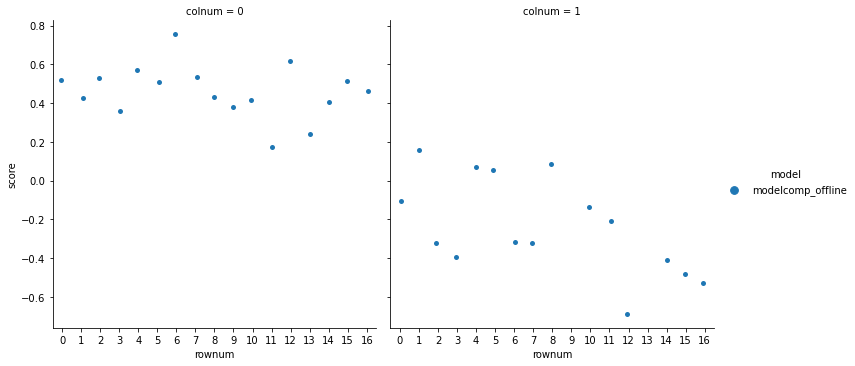

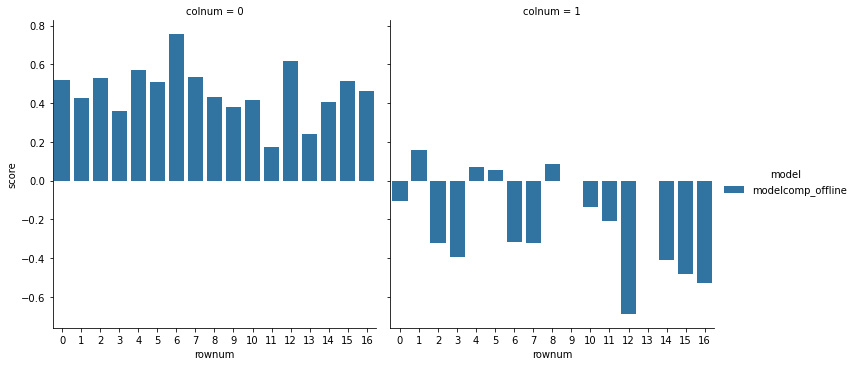

In [39]:
fig1 = sns.catplot(data=df, x="rownum", col="colnum", hue="model", y="score")
fig2 = sns.catplot(data=df[df["model"]=="modelcomp_offline"], x="rownum", col="colnum", hue="model", y="score")

dfthis = df[df["model"]=="modelcomp_offline"]
fig3 = sns.catplot(data=dfthis, x="rownum", col="colnum", hue="model", y="score", kind="bar")


In [40]:
# -- save
fig1.savefig(f"{SAVEDIR}/modelscores-1.pdf")
fig2.savefig(f"{SAVEDIR}/modelscores-2.pdf")
fig3.savefig(f"{SAVEDIR}/modelscores-3.pdf")